In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

| Variable | Description|
| :------- | :------: | 
| C | % Carbon | 
| Si | % Silicon | 
| Mn | % Manganese |
| P| % Phosphorus |
| S | % Sulphur |
| Ni | % Nickel |
| Cr | % Chromium |
| Cu | % Copper |
| Mo | % Molybdenum |
| NT | Normalizing Temperature | 
| THT | Through Hardening Temperature | 
| THt | Through Hardening Time |
| THQCr | Cooling Rate for Through Hardening |
| CT | Carburization Temperature |
| Ct | Carburization Time |
| DT | Diffusion Temperature |
| Dt | Diffusion time |
| QmT | Quenching Media Temperature (for Carburization) |
| TT | Tempering Temperature |
| Tt | Tempering Time |
| TCr | Cooling Rate for Tempering |
| RedRatio | Reduction Ratio (Ingot to Bar) |
| dA | Area Proportion of Inclusions Deformed by Plastic Work |
| dB | Area Proportion of Inclusions Occurring in Discontinuous Array |
| dC | Area Proportion of Isolated Inclusions |
| Fatigue | Rotating Bending Fatigue Strength (10^7 Cycles) |
#### Target Variable:
Target Variable: Fatigue

In [3]:
data = pd.read_csv('fatigue_strength.csv')

In [4]:
data.head()

Sl. No.   NT  THT  THt  THQCr  CT   Ct    DT   Dt  QmT  ...      S    Ni  \
0        1  885   30    0      0  30  0.0  30.0  0.0   30  ...  0.022  0.01   
1        2  885   30    0      0  30  0.0  30.0  0.0   30  ...  0.017  0.08   
2        3  885   30    0      0  30  0.0  30.0  0.0   30  ...  0.015  0.02   
3        4  885   30    0      0  30  0.0  30.0  0.0   30  ...  0.024  0.01   
4        5  885   30    0      0  30  0.0  30.0  0.0   30  ...  0.022  0.01   

     Cr    Cu   Mo  RedRatio    dA    dB    dC  Fatigue  
0  0.02  0.01  0.0       825  0.07  0.02  0.04      232  
1  0.12  0.08  0.0       610  0.11  0.00  0.04      235  
2  0.03  0.01  0.0      1270  0.07  0.02  0.00      235  
3  0.02  0.01  0.0      1740  0.06  0.00  0.00      241  
4  0.02  0.02  0.0       825  0.04  0.02  0.00      225  

[5 rows x 27 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl. No.   437 non-null    int64  
 1   NT        437 non-null    int64  
 2   THT       437 non-null    int64  
 3   THt       437 non-null    int64  
 4   THQCr     437 non-null    int64  
 5   CT        437 non-null    int64  
 6   Ct        437 non-null    float64
 7   DT        437 non-null    float64
 8   Dt        437 non-null    float64
 9   QmT       437 non-null    int64  
 10  TT        437 non-null    int64  
 11  Tt        437 non-null    int64  
 12  TCr       437 non-null    float64
 13  C         437 non-null    float64
 14  Si        437 non-null    float64
 15  Mn        437 non-null    float64
 16  P         437 non-null    float64
 17  S         437 non-null    float64
 18  Ni        437 non-null    float64
 19  Cr        437 non-null    float64
 20  Cu        437 non-null    float6

In [6]:
data.shape

(437, 27)

In [7]:
data.isnull().sum()

Sl. No.     0
NT          0
THT         0
THt         0
THQCr       0
CT          0
Ct          0
DT          0
Dt          0
QmT         0
TT          0
Tt          0
TCr         0
C           0
Si          0
Mn          0
P           0
S           0
Ni          0
Cr          0
Cu          0
Mo          0
RedRatio    0
dA          0
dB          0
dC          0
Fatigue     0
dtype: int64

In [8]:
data.describe().T

count        mean         std      min      25%      50%       75%  \
Sl. No.   437.0  219.000000  126.295289    1.000  110.000  219.000   328.000   
NT        437.0  872.299771   26.212073  825.000  865.000  870.000   870.000   
THT       437.0  737.643021  280.036541   30.000  845.000  845.000   855.000   
THt       437.0   25.949657   10.263824    0.000   30.000   30.000    30.000   
THQCr     437.0   10.654462    7.841437    0.000    8.000    8.000     8.000   
CT        437.0  128.855835  281.743539   30.000   30.000   30.000    30.000   
Ct        437.0   40.502059  126.924697    0.000    0.000    0.000     0.000   
DT        437.0  123.699844  267.128933   30.000   30.000   30.000    30.000   
Dt        437.0    4.843936   15.700076    0.000    0.000    0.000     0.000   
QmT       437.0   35.491991   19.419277   30.000   30.000   30.000    30.000   
TT        437.0  536.842105  164.101963   30.000  550.000  600.000   650.000   
Tt        437.0   65.080092   21.477650    0.000   60.000   60.000    60.000   
TCr       437.0   20.814645    8.072207    0.000   24.000   24.000    24.000   
C         437.0    0.388398    0.096364    0.170    0.340    0.400     0.430   
Si        437.0    0.299588    0.246045    0.160    0.240    0.260     0.290   
Mn        437.0    0.823021    0.279028    0.370    0.700    0.760     0.800   
P         437.0    0.015785    0.005205    0.002    0.012    0.016     0.019   
S         437.0    0.014611    0.006145    0.003    0.010    0.015     0.019   
Ni        437.0    0.517048    0.852976    0.010    0.020    0.060     0.460   
Cr        437.0    0.570458    0.411769    0.010    0.120    0.710     0.980   
Cu        437.0    0.067780    0.049161    0.010    0.020    0.060     0.100   
Mo        437.0    0.069794    0.088124    0.000    0.000    0.000     0.170   
RedRatio  437.0  923.629291  576.617020  240.000  590.000  740.000  1228.000   
dA        437.0    0.047181    0.031093    0.000    0.020    0.040     0.070   
dB        437.0    0.003391    0.008240    0.000    0.000    0.000     0.000   
dC        437.0    0.007712    0.010418    0.000    0.000    0.000     0.010   
Fatigue   437.0  552.903890  186.630528  225.000  448.000  505.000   578.000   

               max  
Sl. No.    437.000  
NT         930.000  
THT        865.000  
THt         30.000  
THQCr       24.000  
CT         930.000  
Ct         540.000  
DT         903.333  
Dt          70.200  
QmT        140.000  
TT         680.000  
Tt         120.000  
TCr         24.000  
C            0.630  
Si           2.050  
Mn           1.600  
P            0.031  
S            0.030  
Ni           2.780  
Cr           1.170  
Cu           0.260  
Mo           0.240  
RedRatio  5530.000  
dA           0.130  
dB           0.050  
dC           0.058  
Fatigue   1190.000

In [9]:
data.drop(columns="Sl. No.",axis=1,inplace=True)

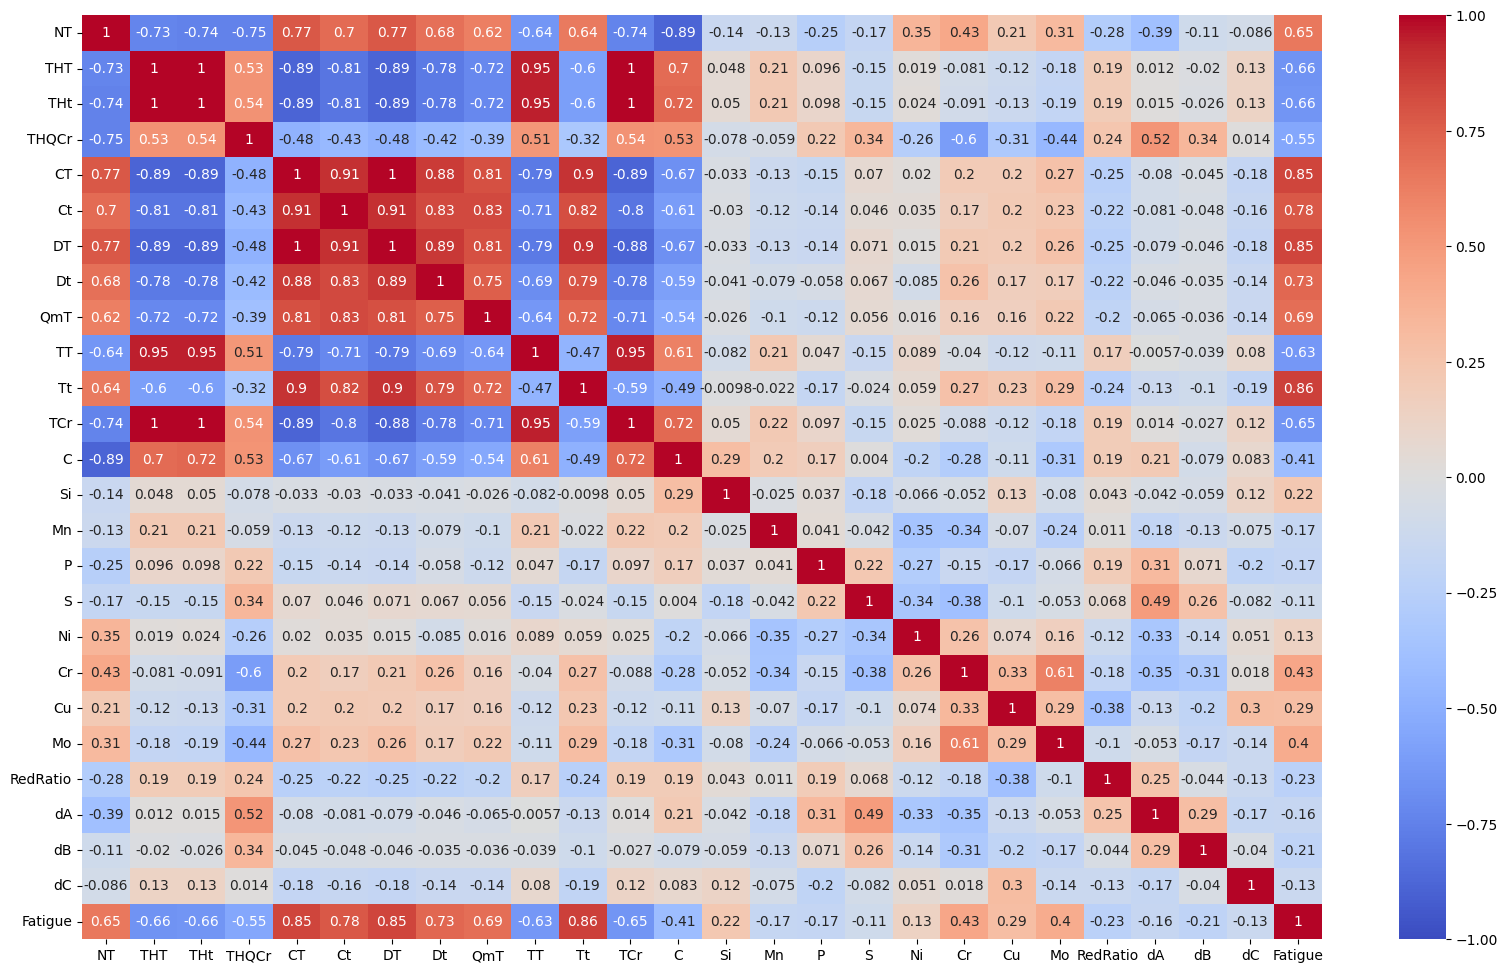

In [10]:
plt.figure(figsize=(20, 12))
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, vmin=-1, cmap='coolwarm')
plt.show()

In [11]:
#import sklearn libraries
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:
#We need to decide best columns for consideration
X = data.drop(columns=["Fatigue"])
y = data['Fatigue']

In [13]:
print("Dataset Shape:", X.shape)

Dataset Shape: (437, 25)


In [14]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, #train_size=0.8
    random_state=42,
    startify=y
)

In [28]:
X_train.shape

(349, 25)

In [29]:
X_test.shape

(88, 25)

In [15]:
# Base XGBoost Regressor
xgb_reg = XGBRegressor(
    n_estimators=200, #number of trees
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror',
    n_jobs=-1
)

In [16]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=-1, num_parallel_tree=None, ...)

In [17]:
# Model Evaluation (Before Tuning)
y_pred = xgb_reg.predict(X_test)

print("\n--- BASE MODEL PERFORMANCE ---")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))



--- BASE MODEL PERFORMANCE ---
RMSE: 21.134952525655663
MAE: 15.427791595458984
R² Score: 0.9891960024833679


In [18]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=True
)

In [20]:
grid_search.fit(X_train, y_train)

print("\nBest Parameters Found:")
print(grid_search.best_params_)


Best Parameters Found:
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [21]:
# Train Best Tuned Model
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

print("\n--- TUNED MODEL PERFORMANCE ---")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("R² Score:", r2_score(y_test, y_pred_best))


--- TUNED MODEL PERFORMANCE ---
RMSE: 20.44120507676185
MAE: 15.385663032531738
R² Score: 0.9898936748504639


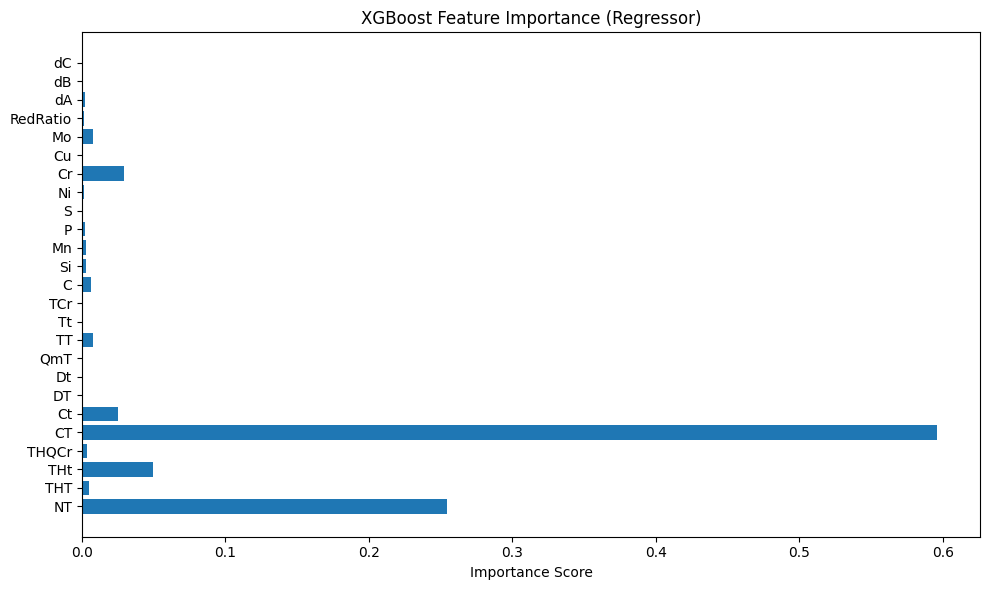

In [22]:
# Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, best_model.feature_importances_)
plt.xlabel("Importance Score")
plt.title("XGBoost Feature Importance (Regressor)")
plt.tight_layout()
plt.show()

In [23]:
X_test.shape

(88, 25)

In [26]:
# Future Predictions (New / Unseen Data)
new_data = X_test.iloc[:5]
new_data.head()

NT  THT  THt  THQCr   CT     Ct     DT    Dt  QmT   TT  ...      P  \
395  930   30    0      0  930  540.0  850.0  15.0  140  160  ...  0.015   
78   845  845   30     24   30    0.0   30.0   0.0   30  650  ...  0.011   
278  870  845   30      8   30    0.0   30.0   0.0   30  650  ...  0.014   
305  900  845   30      8   30    0.0   30.0   0.0   30  650  ...  0.016   
325  870  845   30      8   30    0.0   30.0   0.0   30  630  ...  0.010   

         S    Ni    Cr    Cu    Mo  RedRatio     dA   dB    dC  
395  0.016  1.62  0.59  0.07  0.21       440  0.008  0.0  0.00  
78   0.025  0.12  0.04  0.15  0.00       610  0.090  0.0  0.04  
278  0.008  0.10  0.26  0.10  0.00      1100  0.030  0.0  0.00  
305  0.016  2.63  0.71  0.10  0.00       700  0.010  0.0  0.01  
325  0.012  1.67  0.72  0.07  0.18       640  0.010  0.0  0.00  

[5 rows x 25 columns]

In [27]:
future_predictions = best_model.predict(new_data)

print("\n--- FUTURE PREDICTIONS ---")
print("Predicted Values:", future_predictions)


--- FUTURE PREDICTIONS ---
Predicted Values: [993.3507  408.23776 450.2769  470.17505 541.55084]
